In [1]:
import pathlib
import os
import pymysql
import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import datetime
%matplotlib inline

In [2]:
nodes = pd.read_csv('soundNodes.csv')
nodes.head(10)

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp
0,001e0610ba46,AoT_Chicago,004,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],2017/10/09 00:00:00,NaN
1,001e0610ba13,AoT_Chicago,01C,7801 S Lawndale Ave Chicago IL,41.751238,-87.712990,AoT Chicago (S) [C] {ComEd},2018/01/01 00:00:00,NaN
2,001e0610bc10,AoT_Chicago,01F,State St & 87th Chicago IL,41.736314,-87.624179,AoT Chicago (S) [C],2018/02/22 00:00:00,NaN
3,001e0610ba15,AoT_Chicago,02A,Jeffrey Ave & 95th St Chicago IL,41.722457,-87.575350,AoT Chicago (S) [C],2018/02/22 00:00:00,NaN
4,001e0610bbe5,AoT_Chicago,02C,Martin Luther King Dr & 87th St Chicago IL,41.736495,-87.614529,AoT Chicago (S) [C],2018/02/16 00:00:00,NaN
5,001e0610ee36,AoT_Chicago,051,Cottage Grove Ave & 79th St Chicago IL,41.751295,-87.605288,AoT Chicago (S) [C],2018/02/22 00:00:00,NaN
6,001e0610ee5d,AoT_Chicago,056,Long Ave & Fullerton Ave Chicago IL,41.923996,-87.761072,AoT Chicago (S) [C],2018/02/23 00:00:00,NaN
7,001e06113ad8,AoT_Chicago,062,Ashland Ave & Roosevelt Rd Chicago IL,41.866786,-87.666306,AoT Chicago (S) [C],2018/02/27 00:00:00,NaN
8,001e0611441e,AoT_Chicago,067,Ashland Ave & 47th Chicago IL,41.808594,-87.665048,AoT Chicago (S) [C],2018/02/27 00:00:00,NaN
9,001e06112e77,AoT_Chicago,06B,Ashland Ave & 59th St Chicago IL,41.786756,-87.664343,AoT Chicago (S) [C],2018/02/26 00:00:00,NaN


In [3]:
nodes.shape

(35, 9)

In [4]:
data = pd.read_csv('sound-data.csv')
data.head(10)

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
0,2019/09/30 00:00:02,001e0610f703,metsense,spv1840lr5h_b,intensity,NaN,62.74
1,2019/09/30 00:00:02,001e0611536c,metsense,spv1840lr5h_b,intensity,NaN,62.74
2,2019/09/30 00:00:06,001e0610f6db,metsense,spv1840lr5h_b,intensity,NaN,62.74
3,2019/09/30 00:00:07,001e0610ba46,metsense,spv1840lr5h_b,intensity,NaN,56.72
4,2019/09/30 00:00:08,001e0610f732,metsense,spv1840lr5h_b,intensity,NaN,66.26
5,2019/09/30 00:00:09,001e0610ba15,metsense,spv1840lr5h_b,intensity,NaN,55.00
6,2019/09/30 00:00:09,001e0610bbe5,metsense,spv1840lr5h_b,intensity,NaN,62.74
7,2019/09/30 00:00:09,001e0610ee5d,metsense,spv1840lr5h_b,intensity,NaN,55.00
8,2019/09/30 00:00:09,001e06113d20,metsense,spv1840lr5h_b,intensity,NaN,56.72
9,2019/09/30 00:00:10,001e061144be,metsense,spv1840lr5h_b,intensity,NaN,56.72


In [5]:
data.info()#Overview of dataset related information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709644 entries, 0 to 709643
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  709644 non-null  object 
 1   node_id    709644 non-null  object 
 2   subsystem  709644 non-null  object 
 3   sensor     709644 non-null  object 
 4   parameter  709644 non-null  object 
 5   value_raw  2046 non-null    float64
 6   value_hrf  707598 non-null  float64
dtypes: float64(2), object(5)
memory usage: 37.9+ MB


According to the above results, the total amount of data is 709644, value_ HRF has missing value, there are 2046 items with value_hrf as NaN value. Delete the corresponding sample for the missing value.

The processing results are as follows.

In [6]:
weekdata = pd.read_csv('sound-delData.csv')
weekdata.head(10)

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
0,2019/09/30 00:00:02,001e0610f703,metsense,spv1840lr5h_b,intensity,NaN,62.74
1,2019/09/30 00:00:02,001e0611536c,metsense,spv1840lr5h_b,intensity,NaN,62.74
2,2019/09/30 00:00:06,001e0610f6db,metsense,spv1840lr5h_b,intensity,NaN,62.74
3,2019/09/30 00:00:07,001e0610ba46,metsense,spv1840lr5h_b,intensity,NaN,56.72
4,2019/09/30 00:00:08,001e0610f732,metsense,spv1840lr5h_b,intensity,NaN,66.26
5,2019/09/30 00:00:09,001e0610ba15,metsense,spv1840lr5h_b,intensity,NaN,55.00
6,2019/09/30 00:00:09,001e0610bbe5,metsense,spv1840lr5h_b,intensity,NaN,62.74
7,2019/09/30 00:00:09,001e0610ee5d,metsense,spv1840lr5h_b,intensity,NaN,55.00
8,2019/09/30 00:00:09,001e06113d20,metsense,spv1840lr5h_b,intensity,NaN,56.72
9,2019/09/30 00:00:10,001e061144be,metsense,spv1840lr5h_b,intensity,NaN,56.72


In [7]:
weekdata.info()#Overview of dataset related information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707598 entries, 0 to 707597
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  707598 non-null  object 
 1   node_id    707598 non-null  object 
 2   subsystem  707598 non-null  object 
 3   sensor     707598 non-null  object 
 4   parameter  707598 non-null  object 
 5   value_raw  0 non-null       float64
 6   value_hrf  707598 non-null  float64
dtypes: float64(2), object(5)
memory usage: 37.8+ MB


In [8]:
weekdata.describe()#Fast comprehensive statistical results, including count, mean value, etc

,value_raw,value_hrf
count,0.0,707598.000000
mean,NaN,59.611119
std,NaN,6.563168
min,NaN,55.000000
25%,NaN,56.720000
50%,NaN,56.720000
75%,NaN,62.740000
max,NaN,99.460000


In [9]:
#Convert timestamp type to datetime
SoundLevel = weekdata[weekdata['node_id'] == '001e0610f732'].copy()
SoundLevel.timestamp = pd.to_datetime(SoundLevel.timestamp)
print(SoundLevel.timestamp)

4        2019-09-30 00:00:08
34       2019-09-30 00:00:33
64       2019-09-30 00:00:58
97       2019-09-30 00:01:23
128      2019-09-30 00:01:48
                 ...        
707466   2019-10-06 23:58:01
707494   2019-10-06 23:58:26
707523   2019-10-06 23:58:51
707551   2019-10-06 23:59:16
707580   2019-10-06 23:59:41
Name: timestamp, Length: 24033, dtype: datetime64[ns]


                          node_id subsystem         sensor  parameter  \
timestamp                                                               
2019-09-30 00:00:08  001e0610f732  metsense  spv1840lr5h_b  intensity   
2019-09-30 00:00:33  001e0610f732  metsense  spv1840lr5h_b  intensity   
2019-09-30 00:00:58  001e0610f732  metsense  spv1840lr5h_b  intensity   
2019-09-30 00:01:23  001e0610f732  metsense  spv1840lr5h_b  intensity   
2019-09-30 00:01:48  001e0610f732  metsense  spv1840lr5h_b  intensity   
...                           ...       ...            ...        ...   
2019-10-06 23:58:01  001e0610f732  metsense  spv1840lr5h_b  intensity   
2019-10-06 23:58:26  001e0610f732  metsense  spv1840lr5h_b  intensity   
2019-10-06 23:58:51  001e0610f732  metsense  spv1840lr5h_b  intensity   
2019-10-06 23:59:16  001e0610f732  metsense  spv1840lr5h_b  intensity   
2019-10-06 23:59:41  001e0610f732  metsense  spv1840lr5h_b  intensity   

                     value_raw  value_hrf  
timest

Text(0.5, 0, 'Week of Data')

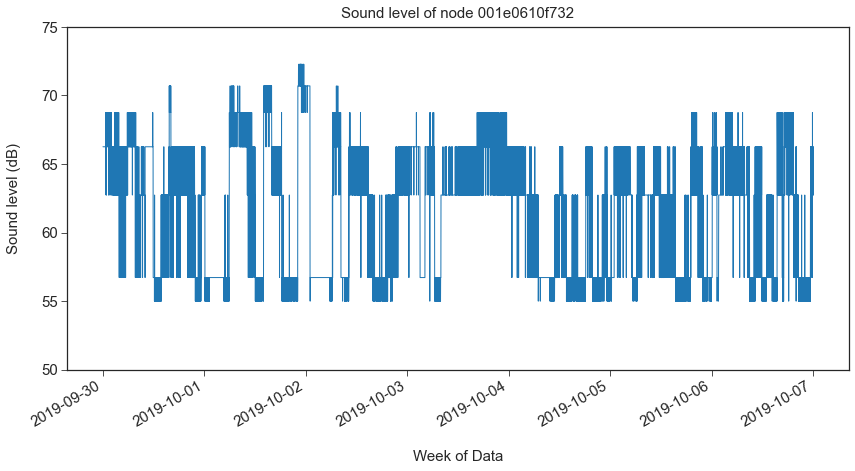

In [10]:
spv = SoundLevel[SoundLevel['node_id'] == '001e0610f732']
spv.index = spv['timestamp']

del spv['timestamp']
print(spv)

plt.style.use('seaborn-ticks')
fig, ax = plt.subplots()

plt.xticks(fontsize = 15, rotation=60)
plt.yticks(fontsize = 15)

#Set Y-axis range
ax.set_ylim(50, 75)

ax.set_title('Sound level of node 001e0610f732',fontsize = 15, fontdict = {'verticalalignment':'bottom'})
ax.set_ylabel('Sound level (dB)',fontsize = 15, labelpad=20)

for nodeId, t in spv.groupby('node_id'):
   t['value_hrf'].plot(ax = ax, figsize=[14,7], linewidth=1)

ax.set_xlabel('Week of Data', fontsize = 15, labelpad=20)
